In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
train_data=data[:2500]
train_target=target[:2500]

test_data=data[2500:]
test_target=target[2500:]

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(2500, 50, 1)
(689, 50, 1)
(2500, 1)
(689, 1)


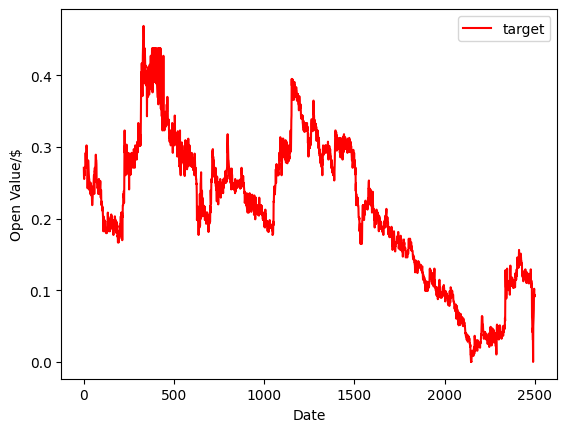

In [3]:
from matplotlib import pyplot as plt

plt.plot(train_target,'r',label='target')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

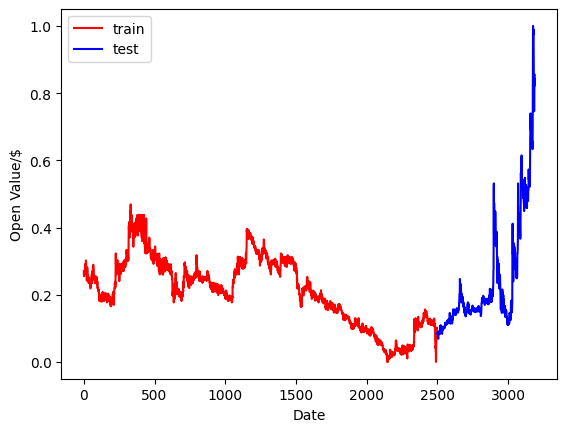

In [4]:
from matplotlib import pyplot as plt

test_x_range=np.arange(2500,3189,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(50,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=56,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=56,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

c:\Users\USER\Music\DeepL\myenvdeep\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
history=model.fit(train_data,train_target,epochs=50, validation_split=0.2)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0104 - val_loss: 3.4314e-04
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 9.0040e-04 - val_loss: 3.5261e-04
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 8.5829e-04 - val_loss: 3.1820e-04
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 8.2600e-04 - val_loss: 2.5580e-04
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 8.1530e-04 - val_loss: 5.6424e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 7.6432e-04 - val_loss: 2.4407e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 6.8819e-04 - val_loss: 3.8473e-04
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 6.0147e-04 - val_loss: 2.6753e-04
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5.8286e-04 - val_loss: 2.5187e-04
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5.4641e-04 - val_loss: 2.6022e-04
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.8605e-04 - 

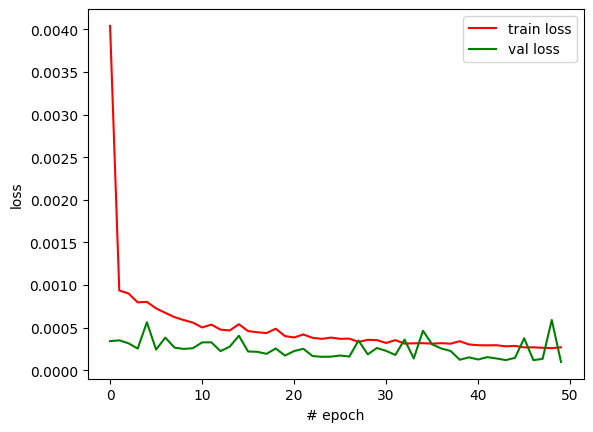

In [8]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
r2 score: 0.9511758028860894


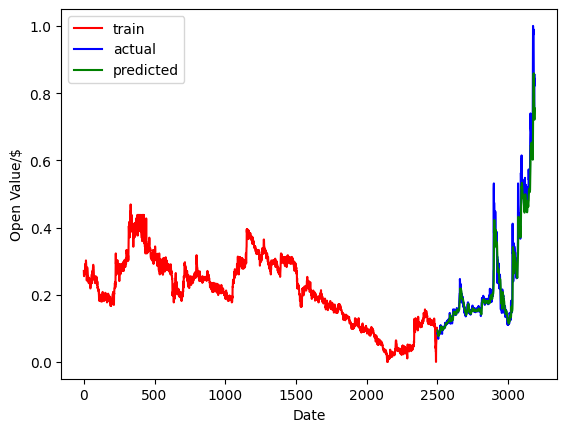

In [10]:
test_x_range=np.arange(2500,3189,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='actual')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

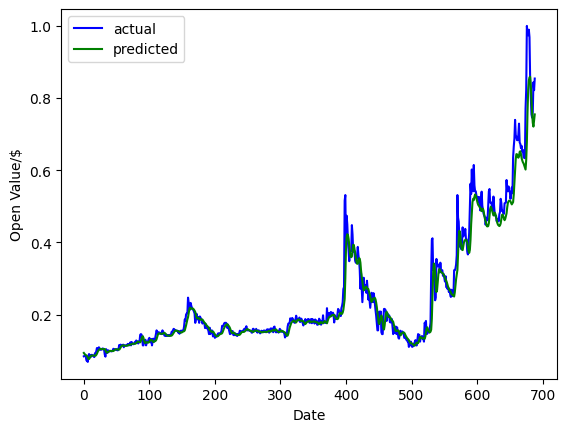

In [11]:
plt.plot(test_target,'b',label='actual')
plt.plot(result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()




In [ ]:
model.save('LSTM-Stock-Market-SLT-autoencoders.keras')